#  Helmholtz instability in 2d



https://www.youtube.com/watch?v=ELaZ2x42dkU&hd=1

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys, os

sys.path.append( os.path.join(os.environ.get("HOME"),"sailfish") ) 

datapath = os.path.join( "/dev/shm/",os.environ.get("USER"),"data")
try:
    os.makedirs(datapath,mode=0755)
except OSError as ex:
    print datapath,"::",ex.strerror

if not os.path.isdir('data') and os.path.islink('data'):
    os.remove("data")
    
if not os.path.islink('data'):
    os.symlink(datapath, "data")

%env BASH_ENV= ~/.bash_profile

/dev/shm/marcin.kostur/data :: File exists
env: BASH_ENV=~/.bash_profile


In [6]:
%%writefile data/ex4.py

import numpy as np
from sailfish.subdomain import Subdomain2D
from sailfish.node_type import NTFullBBWall, NTEquilibriumVelocity
from sailfish.controller import LBSimulationController
from sailfish.lb_single import LBFluidSim

class MyBlock(Subdomain2D):
    max_v = 0.1

    def boundary_conditions(self, hx, hy):
        wall_mapv1 = ( (hy == self.gy-1) )
        wall_mapv0 = ( (hy == 0) )
        
        self.set_node(  wall_mapv1 , NTEquilibriumVelocity((self.max_v, 0.0)) )
        self.set_node(wall_mapv0, NTFullBBWall)
        
    def initial_conditions(self, sim, hx, hy):
        nx,ny = self.gx,self.gy
        sim.rho[:] = 1.0
        sim.vy[(hx==2)&(hy==ny/2-1)] = -0.01
        #border = (hy>2*np.cos(hx/float(nx)*2*np.pi)+ny/2)
        border = (hy>ny/2)       
        #border = (hy>ny/2) | ((hy==ny/2) & (hx>nx/3.) & (hx<2*nx/3.))

        sim.vx[border] = self.max_v
        
        
class MySim(LBFluidSim):
    subdomain = MyBlock

LBSimulationController(MySim).run()

Overwriting data/ex4.py


In [7]:
%%bash
export PYTHONPATH=$PWD/sailfish/
python data/ex4.py --max_iters=10000 --every=100 \
 --lat_nx=1022 --lat_ny=254 \
 --periodic_x --model=mrt \
 --visc=0.001 \
 --output=data/ex4A --output_format=npy

[   671  INFO Master/gpu4.smcebi.us.edu.pl] Machine master starting with PID 98227 at 2017-02-28 10:46:19 UTC
[   671  INFO Master/gpu4.smcebi.us.edu.pl] Simulation started with: data/ex4.py --max_iters=10000 --every=100 --lat_nx=1022 --lat_ny=254 --periodic_x --model=mrt --visc=0.001 --output=data/ex4A --output_format=npy
[   686  INFO Master/gpu4.smcebi.us.edu.pl] Sailfish version: dcc3d33d3c6fe420f78ff1af13471774ef283c74
[   686  INFO Master/gpu4.smcebi.us.edu.pl] Handling subdomains: [0]
[   686  INFO Master/gpu4.smcebi.us.edu.pl] Subdomain -> GPU map: {0: 0}
[   686  INFO Master/gpu4.smcebi.us.edu.pl] Selected backend: cuda
[   986  INFO Subdomain/0] Initializing subdomain.
[   987  INFO Subdomain/0] Required memory: 
[   988  INFO Subdomain/0] . distributions: 18 MiB
[   988  INFO Subdomain/0] . fields: 3 MiB
[  3505  INFO Subdomain/0] Starting simulation.
[ 12187  INFO Subdomain/0] iteration:2000  speed:51.95 MLUPS
[ 16729  INFO Subdomain/0] iteration:3000  speed:56.89 MLUPS
[ 2

In [9]:
!ls -ltra data/ex4*.npz

-rw-r--r-- 1 marcin.kostur staff    3723 Feb 28 11:46 data/ex4A.0.00000.npz
-rw-r--r-- 1 marcin.kostur staff  234047 Feb 28 11:46 data/ex4A.0.00100.npz
-rw-r--r-- 1 marcin.kostur staff  578986 Feb 28 11:46 data/ex4A.0.00200.npz
-rw-r--r-- 1 marcin.kostur staff  828486 Feb 28 11:46 data/ex4A.0.00300.npz
-rw-r--r-- 1 marcin.kostur staff 1070926 Feb 28 11:46 data/ex4A.0.00400.npz
-rw-r--r-- 1 marcin.kostur staff 1296054 Feb 28 11:46 data/ex4A.0.00500.npz
-rw-r--r-- 1 marcin.kostur staff 1349154 Feb 28 11:46 data/ex4A.0.00600.npz
-rw-r--r-- 1 marcin.kostur staff 1364781 Feb 28 11:46 data/ex4A.0.00700.npz
-rw-r--r-- 1 marcin.kostur staff 1385998 Feb 28 11:46 data/ex4A.0.00800.npz
-rw-r--r-- 1 marcin.kostur staff 1409031 Feb 28 11:46 data/ex4A.0.00900.npz
-rw-r--r-- 1 marcin.kostur staff 1461482 Feb 28 11:46 data/ex4A.0.01000.npz
-rw-r--r-- 1 marcin.kostur staff 1528411 Feb 28 11:46 data/ex4A.0.01100.npz
-rw-r--r-- 1 marcin.kostur staff 1588745 Feb 28 11:46 data/ex4A.0.01200.npz
-rw-r--r-- 1

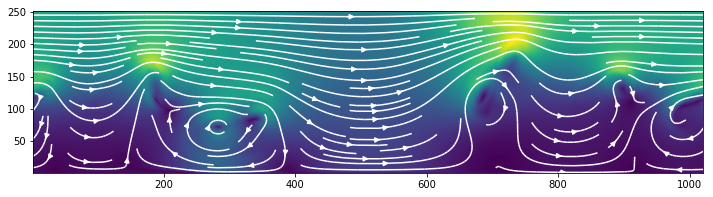

In [10]:
data = np.load("data/ex4A.0.10000.npz")
vx,vy = data['v']
ny,nx = vx.shape
Y,X = np.mgrid[0:ny,0:nx]
plt.figure(figsize=(12,float(ny)/nx*12))
plt.xlim(1,nx-2)
plt.ylim(1,ny-2)
plt.contourf(X,Y,np.sqrt(vy**2+vx**2),256)
plt.streamplot(X,Y,vx,vy,color='white')


### Plotting a part  the domain

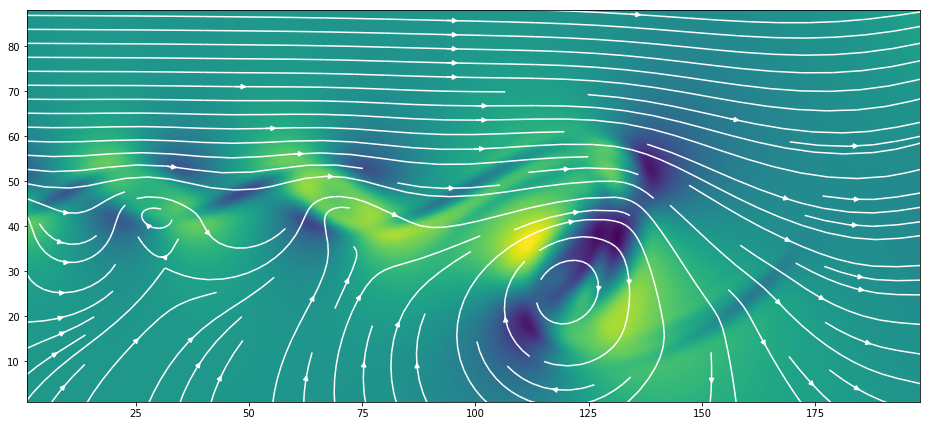

In [12]:
data = np.load("data/ex4A.0.04000.npz")
vx,vy = data['v']
s = (slice(80,170,1),slice(20,220,1))

vx, vy  = vx[s],vy[s]
Dxvx,Dyvx = np.gradient(vx)
Dxvy,Dyvy = np.gradient(vy)
ny,nx = vx.shape
Y,X = np.mgrid[0:ny,0:nx]
plt.figure(figsize=(16,float(ny)/nx*16))
plt.xlim(1,nx-2)
plt.ylim(1,ny-2)
plt.contourf(X,Y,Dyvx-Dxvy,256)
plt.streamplot(X,Y,vx,vy,color='white')


### interactive plotting

In [14]:
import glob
frames = []
s = (slice(80,170,1),slice(20,220,1))

for fn in sorted(glob.glob("data/ex4A*.npz")):
    vx,vy = np.load(fn)['v']
    vx, vy  = vx[s],vy[s]
    Dxvx,Dyvx = np.gradient(vx)
    Dxvy,Dyvy = np.gradient(vy)
    frames.append([vx, vy,Dyvx-Dxvy,Dxvx])


In [15]:
print len(frames)


101


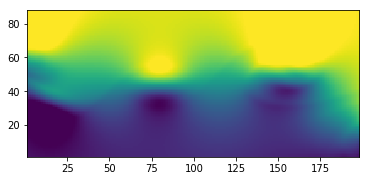

In [20]:
from ipywidgets import interact, interactive, fixed
from ipywidgets import widgets
from IPython.display import display,clear_output
ny,nx = frames[0][0].shape
Y,X = np.mgrid[0:ny,0:nx]

@interact(ith=widgets.IntSlider(min=0,max=len(frames)-1),figsize=widgets.IntSlider(min=0,max=20,value=6))
def g(ith,figsize):
  
    plt.figure(figsize=(figsize,float(ny)/nx*figsize))

    vx,vy=frames[ith][:2]
    plt.xlim(1,nx-2)
    plt.ylim(1,ny-2)
    #plt.contourf(X,Y,frames[ith][2],levels=np.linspace(-0.002,0.002,256))
    plt.imshow(frames[ith][0],vmax=0.1,vmin=-0.01,origin='top')
    #plt.streamplot(X,Y,vx,vy,color='white')
    
    plt.show()

## Geometry experimentation

Interactive trials of initial condition gemometry.

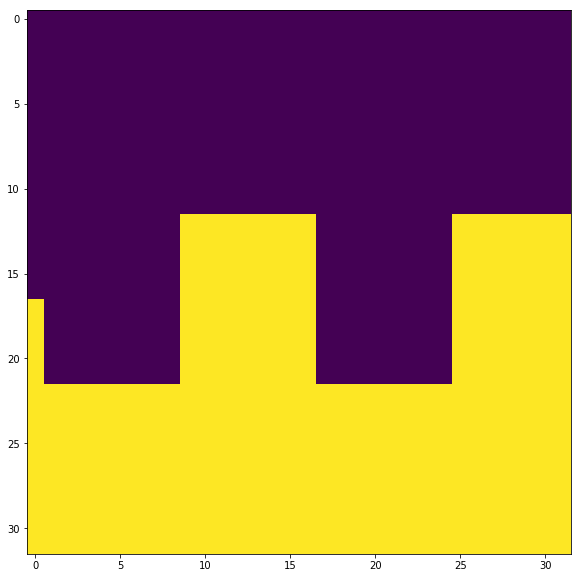

In [21]:
x0,y0,a = 15,8,4
nx,ny=32,32
hy,hx = np.mgrid[0:ny,0:nx]
plt.figure(figsize=(10,float(ny)/nx*10))
# plt.imshow( (hy>2*np.sin(2*hx/float(nx)*2*np.pi)+ny/2),interpolation='nearest') 
#plt.imshow( (hy>ny/2) | ((hy==ny/2) & (hx>nx/3.) & (hx<2*nx/3.) ),interpolation='nearest') 
plt.imshow( hy>5*np.sign(np.sin(2*hx/float(nx)*2*np.pi))+ny/2,interpolation='nearest') 